# Predicting Avocado Prices Using Facebook Prophet 

# Problem Statement:

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# Step #1: Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
avocado = pd.read_csv('avocado.csv')

In [3]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Step #2: Exploring The Dataset 

In [4]:
avocado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
avocado.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [7]:
avocado.tail(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18229,4,2018-02-25,1.49,301985.61,34200.18,49139.34,85.58,218560.51,99989.62,118314.77,256.12,organic,2018,West
18230,5,2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,2018,West
18231,6,2018-02-11,1.47,275248.53,24732.55,61713.53,243.00,188559.45,88497.05,99810.80,251.60,organic,2018,West
18232,7,2018-02-04,1.41,283378.47,22474.66,55360.49,133.41,205409.91,70232.59,134666.91,510.41,organic,2018,West
18233,8,2018-01-28,1.80,185974.53,22918.40,33051.14,93.52,129911.47,77822.23,51986.86,102.38,organic,2018,West
18234,9,2018-01-21,1.83,189317.99,27049.44,33561.32,439.47,128267.76,76091.99,51947.50,228.27,organic,2018,West
18235,10,2018-01-14,1.82,207999.67,33869.12,47435.14,433.52,126261.89,89115.78,37133.99,12.12,organic,2018,West
18236,11,2018-01-07,1.48,297190.60,34734.97,62967.74,157.77,199330.12,103761.55,95544.39,24.18,organic,2018,West
18237,0,2018-03-25,1.62,15303.40,2325.30,2171.66,0.00,10806.44,10569.80,236.64,0.00,organic,2018,WestTexNewMexico
18238,1,2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,2018,WestTexNewMexico


I'm checking the average price in this model with respect to Date to see how the graph looks like

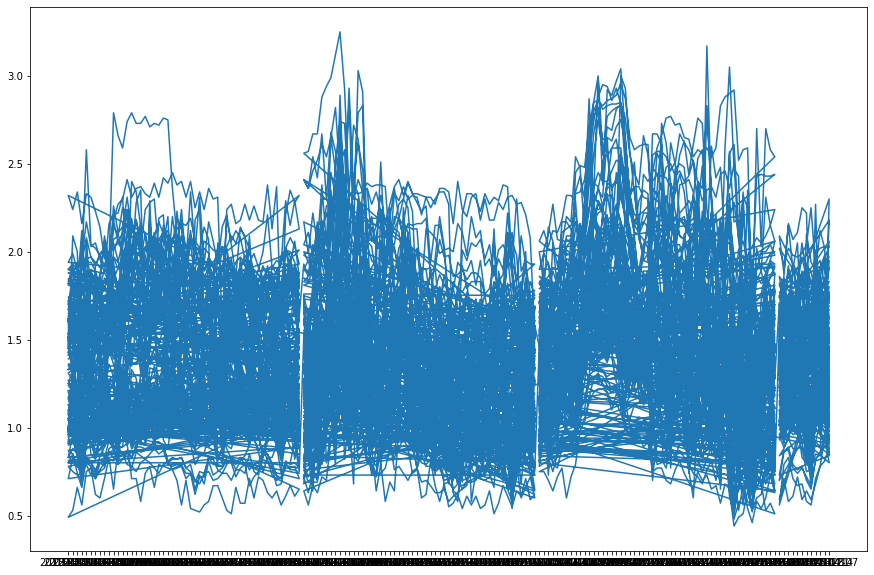

In [8]:
plt.figure(figsize = (15,10))
plt.plot(avocado['Date'], avocado['AveragePrice'])

Okay, so the records are messy since the dates aren't ordered. Thus we would have to order the dates in ascending fashion

In [9]:
avocado = avocado.sort_values('Date')

In [10]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


The dates are arranged but the indexes were misplaced. That's okay.

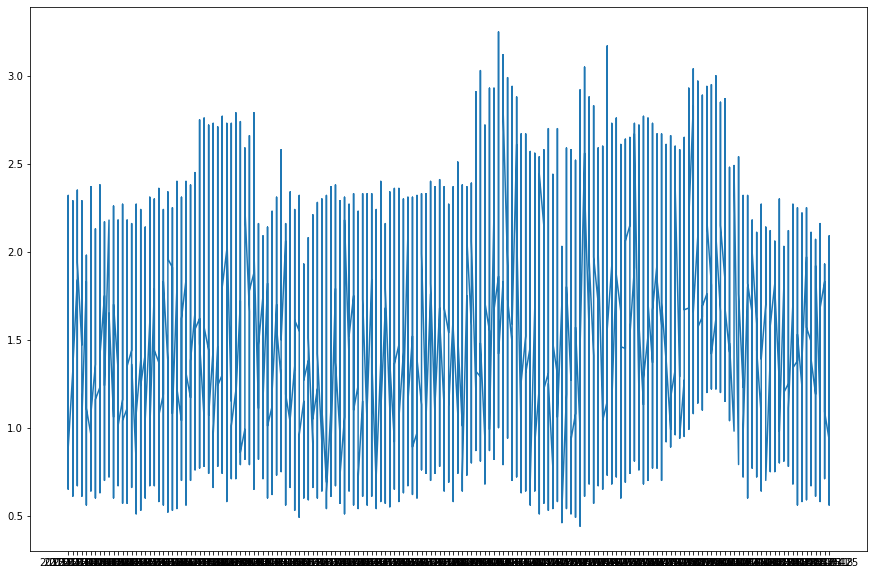

In [11]:
plt.figure(figsize = (15,10))
plt.plot(avocado['Date'], avocado['AveragePrice'])

Let us check how many records of regions of avocado do we have now.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

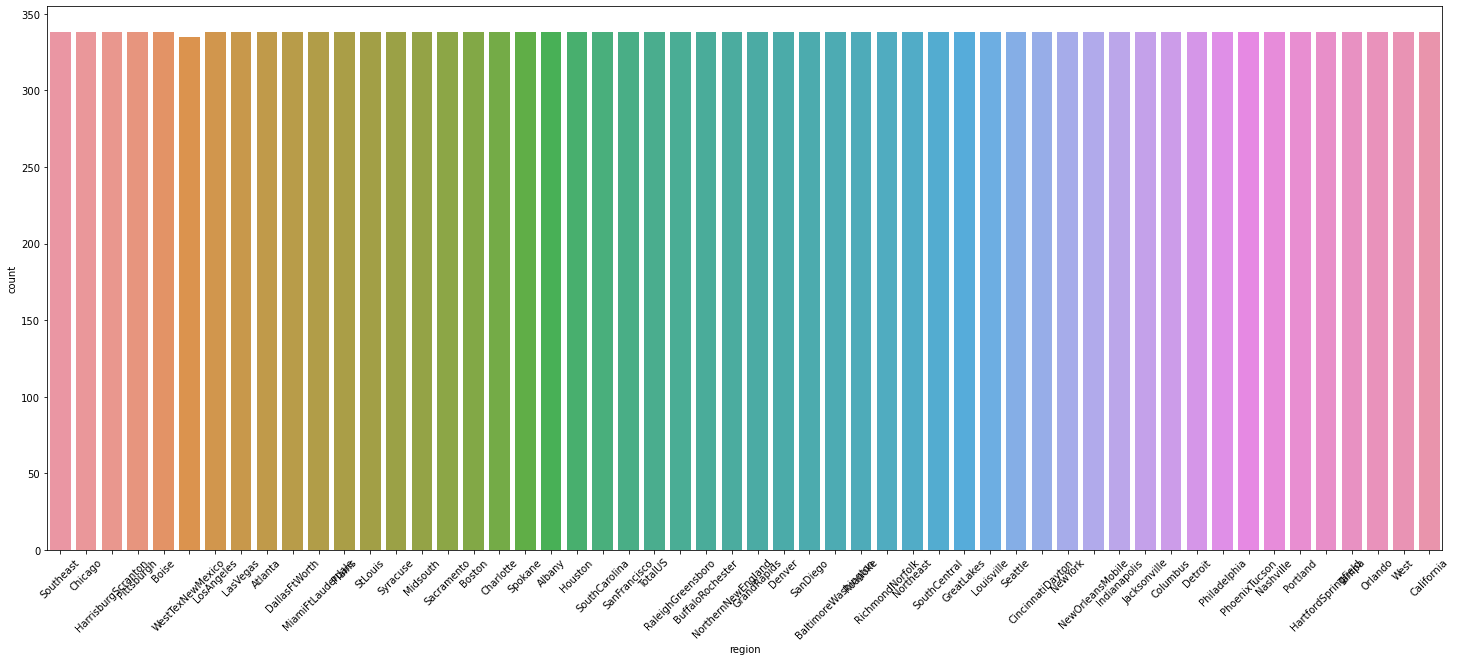

In [12]:
plt.figure(figsize = (25, 10))
sns.countplot(x = 'region', data = avocado)
plt.xticks(rotation = 45)

Records seem almost equal. Let us check avocado sales per year.

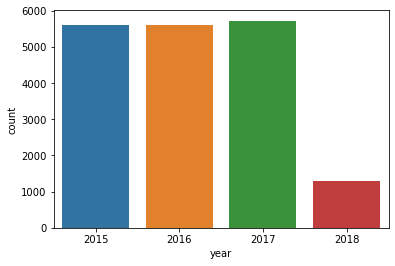

In [13]:
sns.countplot(x = 'year', data = avocado)

Now let us create Prophet time series. We need to extract Date and AveragePrice

In [14]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [15]:
avocado_prophet_df = avocado[['Date', 'AveragePrice']]

In [16]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# Step 3: Make Predictions

Convert Date and Average Price as ds and y respectively. (As a standard rule)

In [17]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [18]:
avocado_prophet_df

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


Create Prophet instance and fit the data with the overall values

In [19]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [21]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.496718,0.878055,1.854976,1.496718,1.496718,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,-0.112798,0.0,0.0,0.0,1.383920
1,2015-01-11,1.491718,0.914886,1.861161,1.491718,1.491718,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,-0.104291,0.0,0.0,0.0,1.387427
2,2015-01-18,1.486719,0.904134,1.849542,1.486719,1.486719,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,-0.103991,0.0,0.0,0.0,1.382728
3,2015-01-25,1.481720,0.893459,1.826378,1.481720,1.481720,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,-0.123042,0.0,0.0,0.0,1.358678
4,2015-02-01,1.476721,0.892887,1.780203,1.476721,1.476721,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,-0.151522,0.0,0.0,0.0,1.325199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.164538,0.560621,1.567125,0.982350,1.339191,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.558923,1.588464,0.980777,1.339586,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.573613,1.603413,0.980306,1.339140,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.559436,1.633430,0.979033,1.338984,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756


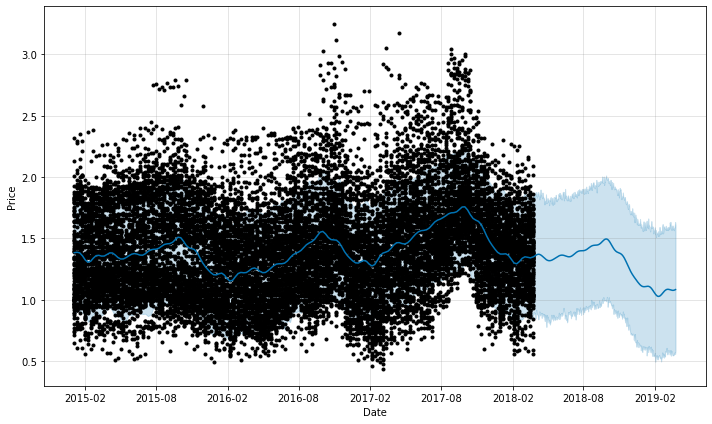

In [22]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

We can see that the prices are given to drop down over one year

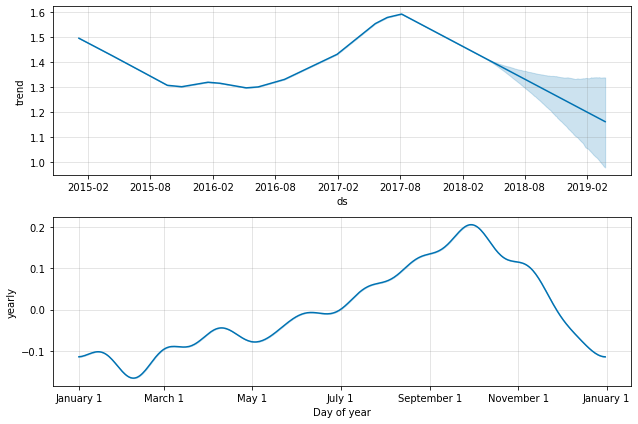

In [23]:
figure = m.plot_components(forecast)

Notice that the forecast of higher prediction sales are observed in the month of October

# Step #4: Calculation of Avocado Prices (in Syracuse):

In [24]:
avocado = pd.read_csv('avocado.csv')

In [25]:
avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
avocado_sample = avocado[avocado['region'] == 'Syracuse']

In [27]:
avocado_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2548,0,2015-12-27,1.36,42344.22,828.65,23560.51,14.41,17940.65,17940.65,0.00,0.0,conventional,2015,Syracuse
2549,1,2015-12-20,1.36,39365.15,646.68,22231.33,12.89,16474.25,16474.25,0.00,0.0,conventional,2015,Syracuse
2550,2,2015-12-13,1.32,50384.57,773.81,33149.83,5.70,16455.23,16455.23,0.00,0.0,conventional,2015,Syracuse
2551,3,2015-12-06,1.17,50632.73,874.90,34439.57,11.91,15306.35,15306.35,0.00,0.0,conventional,2015,Syracuse
2552,4,2015-11-29,1.41,35852.68,719.36,21285.35,8.89,13839.08,13839.08,0.00,0.0,conventional,2015,Syracuse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,7,2018-02-04,1.22,6294.16,85.22,152.09,0.00,6056.85,2847.48,3209.37,0.0,organic,2018,Syracuse
18197,8,2018-01-28,1.19,6393.58,30.09,128.49,0.00,6235.00,5670.94,564.06,0.0,organic,2018,Syracuse
18198,9,2018-01-21,1.27,3159.80,92.12,73.17,0.00,2994.51,2117.69,876.82,0.0,organic,2018,Syracuse
18199,10,2018-01-14,1.25,4343.09,116.19,64.16,0.00,4162.74,1986.09,2176.65,0.0,organic,2018,Syracuse


In [28]:
avocado_sample = avocado_sample.sort_values('Date')

In [29]:
avocado_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2599,51,2015-01-04,1.33,41143.51,2506.61,20905.01,16.68,17715.21,17715.21,0.00,0.0,conventional,2015,Syracuse
11725,51,2015-01-04,1.72,593.39,0.00,102.71,0.00,490.68,490.68,0.00,0.0,organic,2015,Syracuse
2598,50,2015-01-11,1.45,42017.49,984.29,21576.29,14.93,19441.98,19441.98,0.00,0.0,conventional,2015,Syracuse
11724,50,2015-01-11,1.66,762.15,1.24,195.51,0.00,565.40,565.40,0.00,0.0,organic,2015,Syracuse
2597,49,2015-01-18,1.40,40391.55,789.84,24755.46,27.89,14818.36,14818.36,0.00,0.0,conventional,2015,Syracuse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18191,2,2018-03-11,1.25,4685.01,168.95,61.01,0.00,4455.05,775.90,3679.15,0.0,organic,2018,Syracuse
18190,1,2018-03-18,1.19,6981.22,162.32,87.87,0.00,6731.03,2782.91,3948.12,0.0,organic,2018,Syracuse
9067,1,2018-03-18,1.20,71732.63,8952.71,33509.12,83.00,29187.80,9185.93,20001.87,0.0,conventional,2018,Syracuse
9066,0,2018-03-25,1.38,93961.48,10004.38,57087.01,102.70,26767.39,11836.12,14931.27,0.0,conventional,2018,Syracuse


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


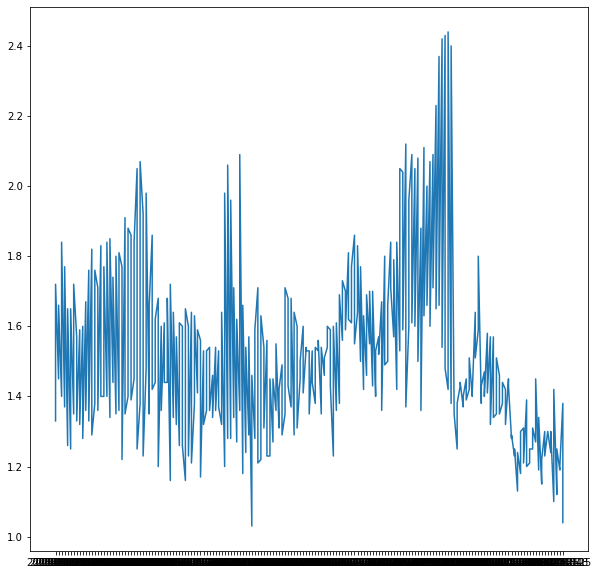

In [30]:
plt.figure(figsize = (10, 10))
plt.plot(avocado_sample['Date'], avocado_sample['AveragePrice'])

In [32]:
avocado_prophet_df = avocado_sample[['Date', 'AveragePrice']]

In [33]:
avocado_prophet_df

,Date,AveragePrice
2599,2015-01-04,1.33
11725,2015-01-04,1.72
2598,2015-01-11,1.45
11724,2015-01-11,1.66
2597,2015-01-18,1.40
...,...,...
18191,2018-03-11,1.25
18190,2018-03-18,1.19
9067,2018-03-18,1.20
9066,2018-03-25,1.38


In [34]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date':'ds', 'AveragePrice':'y'})

In [35]:
avocado_prophet_df

,ds,y
2599,2015-01-04,1.33
11725,2015-01-04,1.72
2598,2015-01-11,1.45
11724,2015-01-11,1.66
2597,2015-01-18,1.40
...,...,...
18191,2018-03-11,1.25
18190,2018-03-18,1.19
9067,2018-03-18,1.20
9066,2018-03-25,1.38


In [36]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [37]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

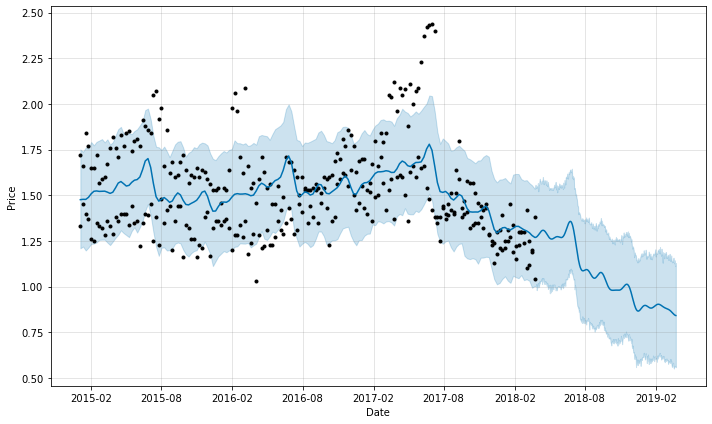

In [38]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

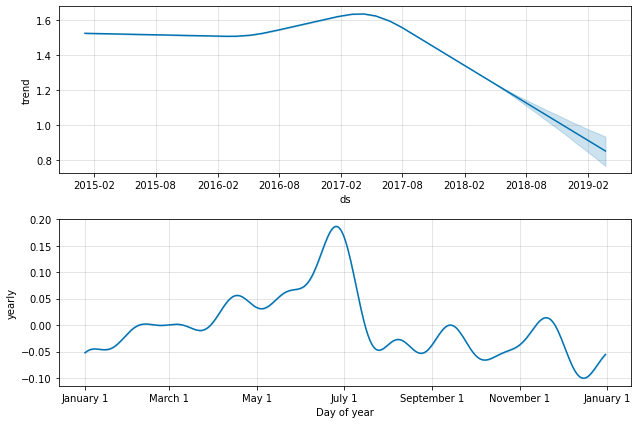

In [39]:
figure = m.plot_components(forecast)

Syracuse observes even a lower dip as compared to the previous representation. However, sales are predicted to be high in the month of July.